## Задание 1.1.3
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

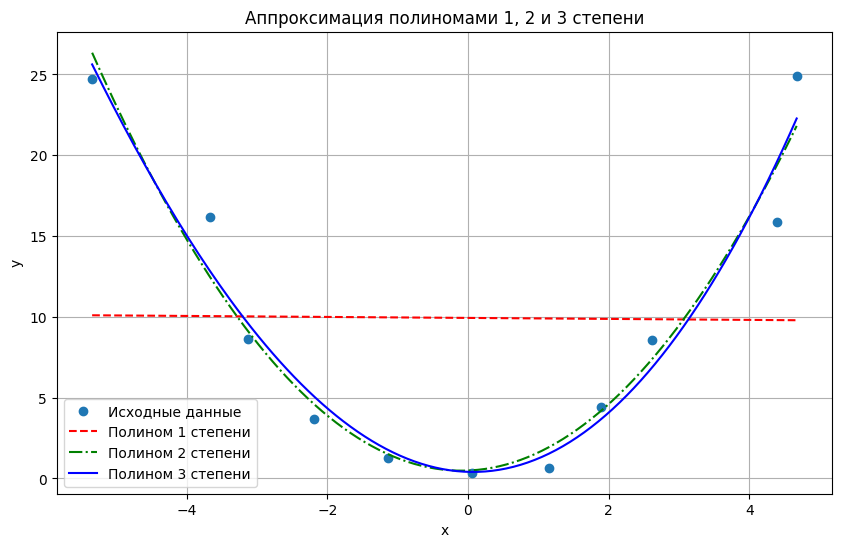

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linspace, ones, vstack, fromfile
from numpy.random import rand
import os

delta = 1.0
x = linspace(-5,5,11)
y = x**2 + delta * (rand(11) - 0.5)
x+= delta * (rand(11) - 0.5)

os.makedirs("files", exist_ok=True)

x.tofile('files/x_data.txt', '\n')
y.tofile('files/y_data.txt', '\n')

x = fromfile('files/x_data.txt', float, sep='\n')
y = fromfile('files/y_data.txt', float, sep='\n')

m1 = vstack((x, ones(len(x)))).T
s1 = np.linalg.lstsq(m1, y, rcond=None)[0]

m2 = vstack((x**2, x, ones(len(x)))).T
s2 = np.linalg.lstsq(m2, y, rcond=None)[0]

m3 = vstack((x**3, x**2, x, ones(len(x)))).T
s3 = np.linalg.lstsq(m3, y, rcond=None)[0]

x_prec = linspace(min(x), max(x), 200)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Исходные данные')

plt.plot(x_prec, s1[0]*x_prec + s1[1], 'r--', label='Полином 1 степени')
plt.plot(x_prec, s2[0]*x_prec**2 + s2[1]*x_prec + s2[2], 'g-.', label='Полином 2 степени')
plt.plot(x_prec, s3[0]*x_prec**3 + s3[1]*x_prec**2 + s3[2]*x_prec + s3[3], 'b-', label='Полином 3 степени')

plt.title("Аппроксимация полиномами 1, 2 и 3 степени")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.savefig("files/polynomial_fit.png")
plt.show()

## Задание 1.1.5
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

Оптимальные параметры: [2.99198354 7.00414284]
Линейное отклонение: 0.00011088017610250185
Сумма квадратов остатков: 0.09749808482082561


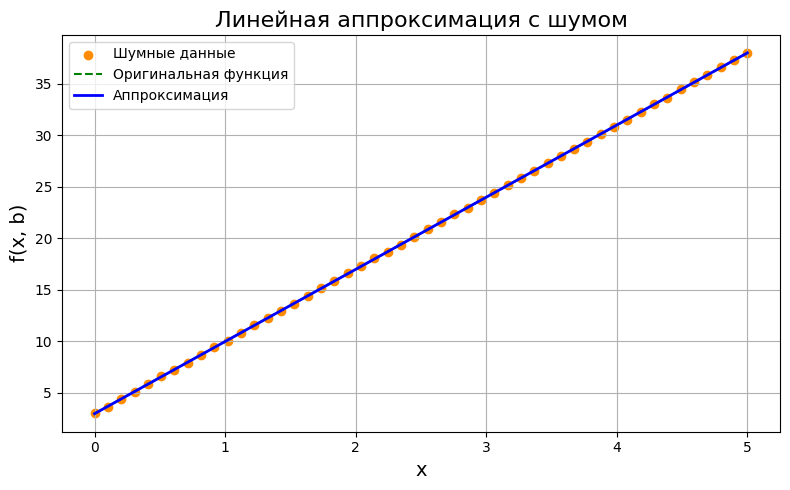

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

params = (3, 7)

def linear_model(x, a, b):
    return a + b * x

x_vals = np.linspace(0, 5, 50)
y_true = linear_model(x_vals, *params)

noise = 0.05 * np.random.randn(len(x_vals))
y_noisy = y_true + noise

opt_params, covariance = opt.curve_fit(linear_model, x_vals, y_noisy)

linear_deviation = np.sum(covariance[0])
squared_residuals = np.sum((y_noisy - linear_model(x_vals, *opt_params)) ** 2)

print("Оптимальные параметры:", opt_params)
print("Линейное отклонение:", linear_deviation)
print("Сумма квадратов остатков:", squared_residuals)

plt.figure(figsize=(8, 5))
plt.scatter(x_vals, y_noisy, color='darkorange', label='Шумные данные')
plt.plot(x_vals, y_true, 'g--', label='Оригинальная функция')
plt.plot(x_vals, linear_model(x_vals, *opt_params), 'b-', linewidth=2, label='Аппроксимация')
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x, b)", fontsize=14)
plt.title("Линейная аппроксимация с шумом", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Задание 1.2.1
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


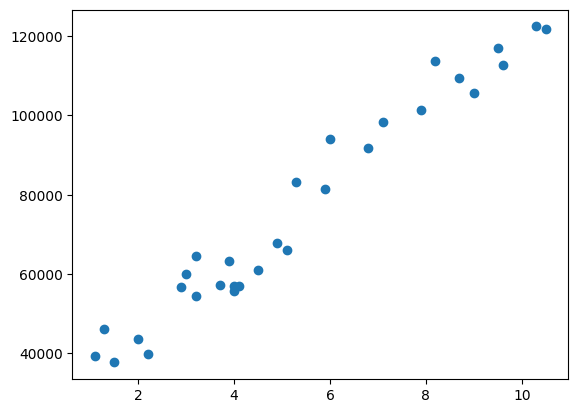

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
25825.984232150113
[9133.88237036]


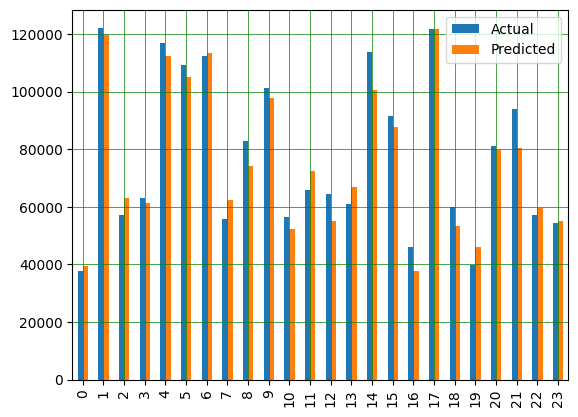

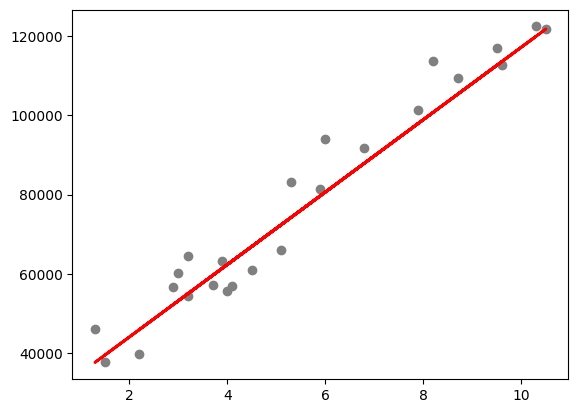

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)
dataset = pd.DataFrame(df)

print(dataset.describe())

plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})


df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

plt.scatter(X_test, y_test,color = 'gray')
plt.plot(X_test, y_pred,color = 'red', linewidth=2)
plt.show()

## Задание 1.3.2

#### **Задание**
Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'

dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Коэффициенты регрессии:", regressor.coef_)
print("Свободный член (intercept):", regressor.intercept_)

df_result = pd.DataFrame({'Фактическое': y_test, 'Прогноз': y_pred})
print(df_result)

print("Среднеквадратичная ошибка (MSE):", metrics.mean_squared_error(y_test, y_pred))

Коэффициенты регрессии: [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]
Свободный член (intercept): 425.59933220324297
   Фактическое     Прогноз
0          534  469.391989
1          410  545.645464
2          577  589.668394
3          571  569.730413
4          577  649.774809
5          704  646.631164
6          487  511.608148
7          587  672.475177
8          467  502.074782
9          580  501.270734
Среднеквадратичная ошибка (MSE): 4666.344787588374


#### **Задание***
Экспериментально получены N − значений величины Y при различных значениях величины X. Определить коэффициенты полиномов первой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета.
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.

<br>

**Вариант 10**

| x | y |
| - | - |
| 0,0 | 6,0 |
| 0,2 | 3,0 |
| 0,4 | 2,0 |
| 0,6 | 6,0 |
| 0,8 | 2,0 |
| 1,0 | 5,0 |

[[0.  1. ]
 [0.2 1. ]
 [0.4 1. ]
 [0.6 1. ]
 [0.8 1. ]
 [1.  1. ]]
-0.5714285714285721 4.285714285714284


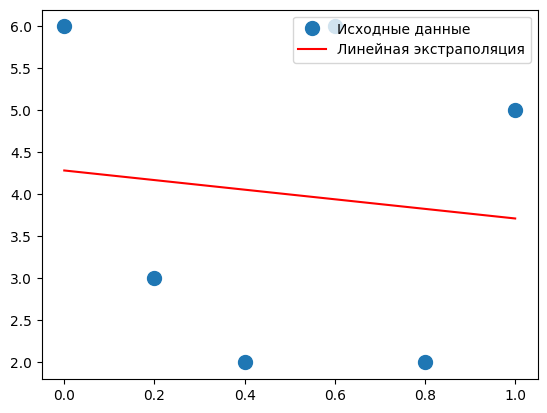

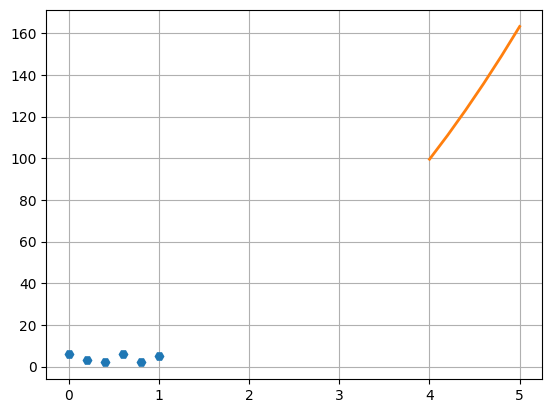

In [ ]:
import numpy as np

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([6.0, 3.0, 2.0, 6.0, 2.0, 5.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m * x + c, color='red', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(4, 5, 6)

plt.plot(x, y, 'H')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()